In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

In [5]:
df = load_diabetes()

In [8]:
dataset = pd.DataFrame(df.data)

In [10]:
dataset.columns = df.feature_names

In [11]:
dataset

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [13]:
#independent and dependent variables
X = dataset
y = df.target

In [14]:
# train and test split
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [19]:
X_train = scalar.fit_transform(X_train)

In [20]:
X_test = scalar.transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [31]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [32]:
##CROSS VALIDATION
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [33]:
np.mean(mse)

np.float64(-3167.8616313016105)

In [34]:
reg_pred = regression.predict(X_test)

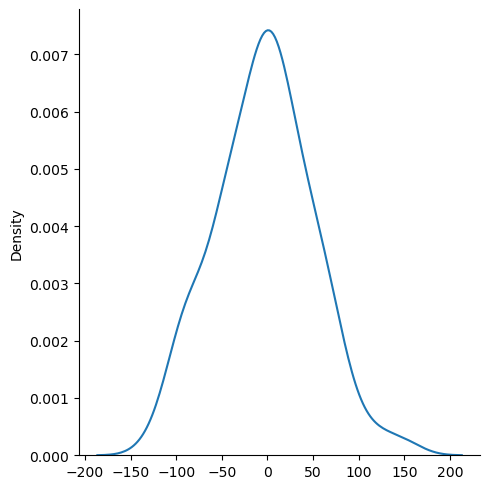

In [37]:
#comparing the difference between predicted values with the actual values
sns.displot(reg_pred - y_test, kind='kde')


In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, reg_pred)


0.4772897164322617

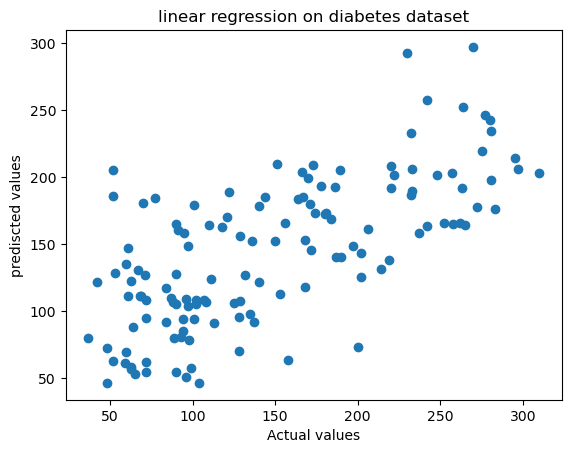

In [46]:
plt.scatter(y_test, reg_pred)
plt.xlabel("Actual values")
plt.ylabel('prediscted values')
plt.title('linear regression on diabetes dataset')
plt.show()